In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [42]:
df = []
df.append(pd.read_csv('in/zad3_xrd_1.txt', sep='\s+', decimal='.'))
df.append(pd.read_csv('in/zad3_xrd_2.txt', sep='\s+', decimal='.'))
df.append(pd.read_csv('in/zad3_xrd_3.txt', sep='\s+', decimal='.'))
df.append(pd.read_csv('in/zad3_xrd_4.txt', sep='\s+', decimal='.'))
df.append(pd.read_csv('in/zad3_xrd_5.txt', sep='\s+', decimal='.'))

def calculate_maxima(df):
    peaks = find_peaks(df['F']) #[132 132 134 32 3 24]
    return df.iloc[peaks[0]]



In [43]:
_lambda = 1.4767 #Angstrom
_d = 3.52 #Angstrom, stała sieciowa

In [44]:
#odległość międzypłaszczyznowa
def calculate_d_hkl(h,k,l)-> float:
    return _d/np.sqrt(h**2 + k**2 + l**2)

#2theta
def calculate_2_theta(h,k,l,n):
    return 2*np.arcsin((n*_lambda/2)/calculate_d_hkl(h,k,l))

#F_hkl
def calculate_F_hkl(h,k,l):
    return 1 + (-1)**(h+k) + (-1)**(h+l) + (-1)**(k+l)

#sprawdz czy legitne
def calculate_check(h,k,l):
    cond_1 = (np.sin(np.radians(10))*2*_d/_lambda)**2 <= (h**2 + k**2 + l**2)
    cond_2 = (np.sin(np.radians(45))*2*_d/_lambda)**2 >= (h**2 + k**2 + l**2)
    return cond_1 & cond_2

print('min = ', (np.sin(np.radians(10))*2*_d/_lambda)**2)
print('max = ', (np.sin(np.radians(45))*2*_d/_lambda)**2)

min =  0.6853323438156173
max =  11.363988167727909


In [45]:
tab = []
for (h) in range(0, 10):
    for(k) in range(0, 10):
        for(l) in range(0, 10):
            if calculate_check(h,k,l)==True :
                tab.append([h,k,l,calculate_d_hkl(h,k,l),np.degrees(calculate_2_theta(h,k,l,1)), calculate_F_hkl(h,k,l)])



hkl_df = pd.DataFrame(tab, columns=['h','k','l','d', '2theta', 'F/phi'])
hkl_df

,h,k,l,d,2theta,F/phi
0,0,0,1,3.520000,24.216403,0
1,0,0,2,1.760000,49.608201,4
2,0,0,3,1.173333,77.993391,0
3,0,1,0,3.520000,24.216403,0
4,0,1,1,2.489016,34.512212,0
5,0,1,2,1.574192,55.943260,0
6,0,1,3,1.113122,83.106325,0
7,0,2,0,1.760000,49.608201,4
8,0,2,1,1.574192,55.943260,0
9,0,2,2,1.244508,72.781181,4


In [52]:
hkl_df = hkl_df.drop_duplicates(subset=['d', '2theta'], keep="first")
hkl_df.to_csv('out/hkl_no_duplicates.csv', index=False)
hkl_df

,h,k,l,d,2theta,F/phi
0,0,0,1,3.520000,24.216403,0
1,0,0,2,1.760000,49.608201,4
2,0,0,3,1.173333,77.993391,0
4,0,1,1,2.489016,34.512212,0
5,0,1,2,1.574192,55.943260,0
6,0,1,3,1.113122,83.106325,0
9,0,2,2,1.244508,72.781181,4
17,1,1,1,2.032273,42.607526,4
18,1,1,2,1.437034,61.834738,0
19,1,1,3,1.061320,88.164504,4


In [51]:

hkl_te_wazne = hkl_df.loc[hkl_df['F/phi'] == 4]
hkl_te_wazne.to_csv('out/hkl_te_wazne.csv', index=False)
hkl_te_wazne

,h,k,l,d,2theta,F/phi
1,0,0,2,1.760000,49.608201,4
9,0,2,2,1.244508,72.781181,4
17,1,1,1,2.032273,42.607526,4
19,1,1,3,1.061320,88.164504,4


In [58]:
data_index = 1
combined_dataframe = pd.DataFrame()
for data in df:
    maxima = calculate_maxima(data)
    print(maxima)
    maxima.to_csv(f'out/maxima_{data_index}.csv', index=False)
    data_index += 1

       theta           F
1835  38.383  250467.813
2458  44.624  119904.172
4486  64.941   74335.914
5793  78.034   85001.406
6211  82.222   26563.133
       theta           F
1805  38.082  786711.750
2422  44.264  385256.688
4430  64.380  256272.688
5722  77.323  307869.125
6135  81.460   90508.586
       theta           F
1868  38.714  231649.125
3585  55.915   35479.641
4999  70.080   63255.230
6294  83.053   18953.586
       theta           F
2257  42.611  117718.258
2955  49.603   54579.770
5269  72.785   30955.779
6804  88.162   36080.078
       theta          F
2042  40.457  75180.242
3848  58.549  11087.729
5348  73.576  20561.938
6738  87.501   6320.149


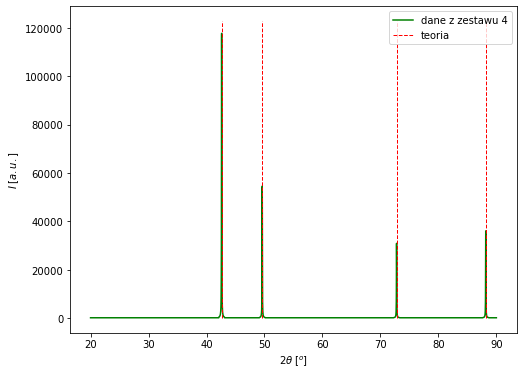

In [77]:
df_zad_4 = df[3]

plt.figure(figsize=(8,6))

plt.plot(df_zad_4['theta'], df_zad_4['F'], color='green', label='dane z zestawu 4')

plt.vlines(hkl_te_wazne['2theta'], ymin=df_zad_4['F'].min(), ymax=df_zad_4['F'].max() + 5000, linestyle='--', color='red', label='teoria', linewidth = 1)

plt.legend()

plt.xlabel('$2 \\theta \; [^o]$')
plt.ylabel('$I \; [a.u.]$')

plt.savefig('out/maxima_zad_3.jpg', dpi=350)
plt.show()